# Plotting GW memory using sxs

In [1]:
import sxs
import numpy as np
from matplotlib import pyplot as plt

In [2]:
outdir = '../out_gwmem_2022/'

Below is the standard example from the documentation of the `add_memory` function from the [sxs package](https://github.com/sxs-collaboration/sxs). Very simple. It yields only the $J_E$ term from [Mitman et al. (2021) [arXiv: 2011.01309]](https://arxiv.org/pdf/2011.01309.pdf).

In [3]:
h = sxs.load("SXS:BBH:0305/Lev/rhOverM", extrapolation_order=3) # 0305 corresponds to GW150914
h_with_memory = sxs.waveforms.memory.add_memory(h, integration_start_time=1000.0)

/Users/boris.goncharov/opt/anaconda3/envs/gwmem_sxs/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


## Displacement memory, $J_E$

## Total contribution to the waveform

A typical illustration of the GW memory effect

/Users/boris.goncharov/opt/anaconda3/envs/gwmem_sxs/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


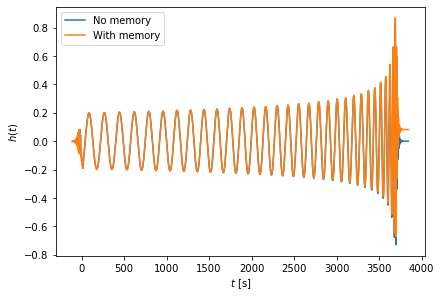

In [4]:
plt.plot(h.t, np.sum(h,axis=1), label='No memory')
plt.plot(h_with_memory.t, np.sum(h_with_memory,axis=1), label='With memory')
plt.tight_layout()
plt.xlabel('$t$ [s]')
plt.ylabel('$h(t)$')
plt.legend()

Only the contribution of GW memory

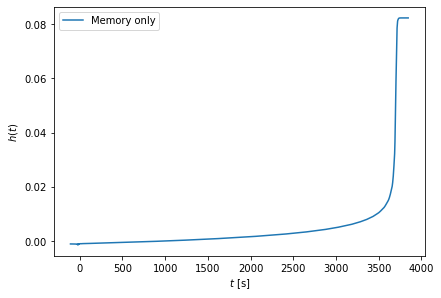

In [5]:
plt.plot(h_with_memory.t, np.sum(h_with_memory,axis=1)-np.sum(h,axis=1), label='Memory only')
plt.tight_layout()
plt.xlabel('$t$ [s]')
plt.ylabel('$h(t)$')
plt.legend()

And all together, zoomed in. Memory contributes only to the final cycles of the inspiral.

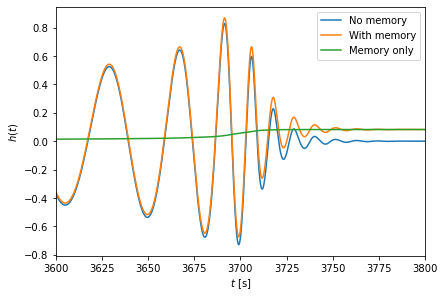

In [116]:
plt.plot(h.t, np.sum(h,axis=1), label='No memory')
plt.plot(h_with_memory.t, np.sum(h_with_memory,axis=1), label='With memory')
plt.plot(h_with_memory.t, np.sum(h_with_memory,axis=1)-np.sum(h,axis=1), label='Memory only')
plt.tight_layout()
plt.xlabel('$t$ [s]')
plt.ylabel('$h(t)$')
plt.xlim([3600, 3800])
#plt.ylim([0, 0.1])
plt.legend()

Normalized waveform

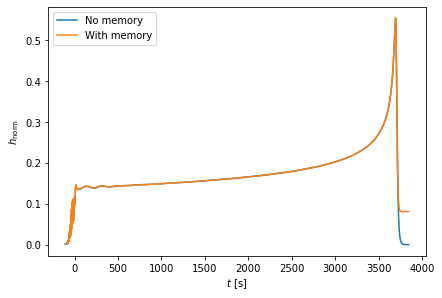

In [7]:
plt.plot(h.t, h.norm, label='No memory')
plt.plot(h_with_memory.t, h_with_memory.norm, label='With memory')
plt.tight_layout()
plt.xlabel('$t$ [s]')
plt.ylabel('$h_\mathrm{norm}$')
plt.legend()

### Spherical harmonic modes

Now, let us consider only $Y(l,m)$ sperical harmonic modes of the waveform. The literature suggests that $(2,0)$ mode represents the major contribution to GW memory, "for non-precessing equal-mass binaries".

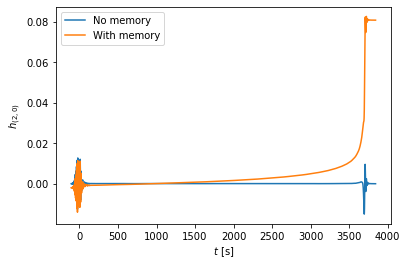

In [8]:
plt.plot(h.t, h["Y_l2_m0.dat"][:,1], label='No memory')
plt.plot(h_with_memory.t, h_with_memory["Y_l2_m0.dat"][:,1], label='With memory')
plt.xlabel('$t$ [s]')
plt.ylabel('$h_{(2,0)}$')
plt.legend()

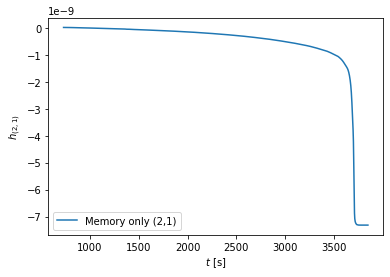

In [9]:
plt.plot(h_with_memory.t[1000:], h_with_memory["Y_l2_m1.dat"][:,1][1000:]-h["Y_l2_m1.dat"][:,1][1000:], 
         label='Memory only (2,1)')
plt.xlabel('$t$ [s]')
plt.ylabel('$h_{(2,1)}$')
plt.legend()

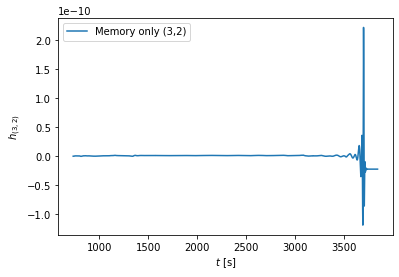

In [10]:
#plt.plot(h.t, h["Y_l3_m2.dat"][:,1], label='No memory')
plt.plot(h_with_memory.t[1000:], h_with_memory["Y_l3_m2.dat"][:,1][1000:]-h["Y_l3_m2.dat"][:,1][1000:], 
         label='Memory only (3,2)')
plt.xlabel('$t$ [s]')
plt.ylabel('$h_{(3,2)}$')
plt.legend()

## Other memory contributions

The three remaining contributions are $J_m$, $J_{\hat{N}}$, and $J_J$. For some reason, they are not included to the function `add_memory`, but the functions to calculate them are written in `sxs.waveforms.memory`. The example for how to add them is adopted from [Mike Boyle's notebook](https://gist.github.com/moble/819a123a243d77565e9924ab5c664e00).

For this, we need $\Psi_2$. However, only $\Psi_4$ is available the same way as the simulated strain. The list of available data is on Zenodo pages for SXS simulations. For example, this is how to load $\Psi_4$:

In [11]:
psi4 = sxs.load("SXS:BBH:0305/Lev/rMPsi4", extrapolation_order=3) # 0305 corresponds to GW150914

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rMPsi4_Asymptotic_GeometricUnits_CoM.h5


With that, currently, $\Psi_2$ is only available for [13 SXS simulations](https://data.black-holes.org/waveforms/extcce_catalog.html). So, let us choose simulation 0001 and load the extrapolated wavefrom from the standard catalog, as well as (1) CCE, (2) extrapolated+memory, and (3) $\Psi_2$ from the extended catalog.

Note, to avoid errors, the time arrays corresponding to the data should match. E.g., waveform time vectors in the extended SXS catalog do not match those in the regular SXS catalog. So, I could not apply $\Psi_2$ from the extended catalog on the regular catalog waveforms... :(

In [48]:
hh = sxs.load("SXS:BBH:0001/Lev/rhOverM", extrapolation_order=3) # available in catalog
hh_ext_mem = sxs.load("../data_gwmem_2022/SXS-BBH_ExtCCE-0001/Lev5/rhOverM_Extrapolated_N5_CoM_Mem.json")
hh_cce_mem = sxs.load("../data_gwmem_2022/SXS-BBH_ExtCCE-0001/Lev5/rhOverM_BondiCce_R0070_CoM.json")
hh_psi2 = sxs.load("../data_gwmem_2022/SXS-BBH_ExtCCE-0001/Lev5/r3Psi2OverM_Extrapolated_N5_CoM.json")

Found the following files to load from the SXS catalog:
    SXS:BBH:0001v6/Lev5/rhOverM_Asymptotic_GeometricUnits_CoM.h5


Originally, waveforms do not have the same merger time, even though they are for the same simulation. So, I normalize time vectors using `max_norm_time` parameter.

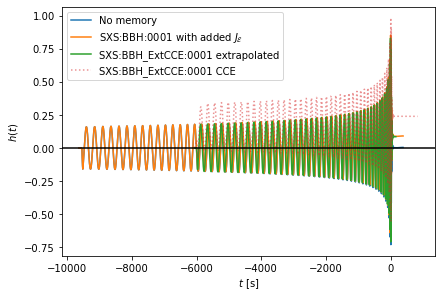

In [101]:
plt.plot(hh.t - hh.t[hh.index_closest_to(hh.max_norm_time())], np.sum(hh,axis=1), label='No memory')
plt.plot(h_𝓔.t - h_𝓔.t[h_𝓔.index_closest_to(h_𝓔.max_norm_time())], np.sum(h_𝓔,axis=1), label='SXS:BBH:0001 with added $J_\mathcal{E}$')
plt.plot(hh_ext_mem.t - hh_ext_mem.t[hh_ext_mem.index_closest_to(hh_ext_mem.max_norm_time())], np.sum(hh_ext_mem,axis=1), label='SXS:BBH_ExtCCE:0001 extrapolated')
plt.plot(hh_cce_mem.t - hh_cce_mem.t[hh_cce_mem.index_closest_to(hh_cce_mem.max_norm_time())], np.sum(hh_cce_mem,axis=1), linestyle=':', alpha=0.5, label='SXS:BBH_ExtCCE:0001 CCE')
plt.axhline(0,color='black')
plt.tight_layout()
plt.xlabel('$t$ [s]')
plt.ylabel('$h(t)$')
#plt.ylim([0,0.1])
plt.legend()

Note, the CCE waveform also seems to have a vertical offset in strain. I plot the sum of the Python strain object, which is supposed to sum over spherical harmonic modes of the waveform. Perhaps the CCE waveform has some additional contributions to this.

It would be useful to understand this.

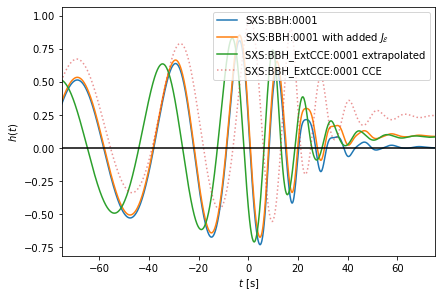

In [117]:
plt.plot(hh.t - hh.t[hh.index_closest_to(hh.max_norm_time())], np.sum(hh,axis=1), label='SXS:BBH:0001')
plt.plot(h_𝓔.t - h_𝓔.t[h_𝓔.index_closest_to(h_𝓔.max_norm_time())], np.sum(h_𝓔,axis=1), label='SXS:BBH:0001 with added $J_\mathcal{E}$')
plt.plot(hh_ext_mem.t - hh_ext_mem.t[hh_ext_mem.index_closest_to(hh_ext_mem.max_norm_time())], np.sum(hh_ext_mem,axis=1), label='SXS:BBH_ExtCCE:0001 extrapolated')
plt.plot(hh_cce_mem.t - hh_cce_mem.t[hh_cce_mem.index_closest_to(hh_cce_mem.max_norm_time())], np.sum(hh_cce_mem,axis=1), linestyle=':', alpha=0.5, label='SXS:BBH_ExtCCE:0001 CCE')
plt.axhline(0,color='black')
plt.tight_layout()
plt.xlabel('$t$ [s]')
plt.ylabel('$h(t)$')
#plt.ylim([0, 0.1])
plt.xlim([-75, 75])
plt.legend()

Below are some examples from Mike's notebook.

In [129]:
peak_time = hh.max_norm_time()
i1, i2 = 0, hh.n_times
ia, ib = hh.index_closest_to(peak_time-220), hh.index_closest_to(peak_time+170)

Now, let us add memory following Mike's tutorial:

In [130]:
h_𝓔 = sxs.waveforms.memory.add_memory(hh)

Assuming that waveforms in the extended catalog contain only the displacement memory, we can also add other memory terms:

In [152]:
J_m = sxs.waveforms.memory.J_m(hh_ext_mem[i1:i2], hh_psi2[i1:i2]) 
#J_𝓔 = sxs.waveforms.memory.J_E(hh_ext_mem[i1:i2]) # Displacement memory is already added
J_N̂ = sxs.waveforms.memory.J_Nhat(hh_ext_mem[i1:i2], hh_psi2[i1:i2])
J_𝓙 = sxs.waveforms.memory.J_J(hh_ext_mem[i1:i2])

#J = J_m + J_𝓔 + J_N̂ + J_𝓙 # Displacement memory is already added
J = J_m + J_N̂ + J_𝓙

Something interesting happens below. Although `hh_ext_mem` already has displacement memory, $\mathcal{J}$ matches the regular catalog waveform without displacement memory. If we add the $\mathcal{J}_J$ to it, displacement memory appears again.

It seems like when we add GW memory terms, these terms disappear from the extrapolated waveform in the extended catalog and then added again. This needs to be verified in the future.

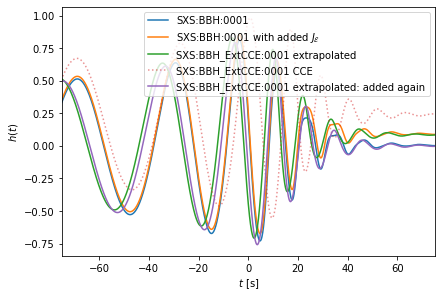

In [155]:
plt.plot(hh.t - hh.t[hh.index_closest_to(hh.max_norm_time())], np.sum(hh,axis=1), label='SXS:BBH:0001')
plt.plot(h_𝓔.t - h_𝓔.t[h_𝓔.index_closest_to(h_𝓔.max_norm_time())], np.sum(h_𝓔,axis=1), label='SXS:BBH:0001 with added $J_\mathcal{E}$')
plt.plot(hh_ext_mem.t - hh_ext_mem.t[hh_ext_mem.index_closest_to(hh_ext_mem.max_norm_time())], np.sum(hh_ext_mem,axis=1), label='SXS:BBH_ExtCCE:0001 extrapolated')
plt.plot(hh_cce_mem.t - hh_cce_mem.t[hh_cce_mem.index_closest_to(hh_cce_mem.max_norm_time())], np.sum(hh_cce_mem,axis=1), linestyle=':', alpha=0.5, label='SXS:BBH_ExtCCE:0001 CCE')
# Below one is normalized empirically
plt.plot(J.t[1000:] - 5980, np.sum(J.data[1000:,],axis=1),label='SXS:BBH_ExtCCE:0001 extrapolated: added again')
plt.tight_layout()
plt.xlabel('$t$ [s]')
plt.ylabel('$h(t)$')
#plt.ylim([0, 0.1])
plt.xlim([-75, 75])
plt.legend()

For the reference, below are time vector lengths for different data from both the regular and extended SXS catalogs:

In [45]:
hh_psi2.t.shape

(17118,)

In [46]:
hh.t.shape

(27336,)

In [75]:
psi4.t.shape

(13869,)

In [49]:
hh_ext_mem.t.shape

(17118,)

In [50]:
hh_cce_mem.t.shape

(22949,)

In [74]:
hh.t[63:]

array([ -76.76393414,  -76.26393352,  -75.76393281, ..., 9912.24770158,
       9912.34770192, 9912.44770226])

In [52]:
hh_psi2.t

array([ -77.00367537,  -75.96396214,  -74.92424892, ..., 6139.01170533,
       6139.11170327, 6139.21170123])